In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.metrics import root_mean_squared_error,r2_score
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [2]:
# Load the California Housing dataset
df = pd.read_csv('california_housing.csv')

# Display the first few rows of the dataset
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

In [3]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [ ]:
df.describe(include='all')

In [4]:
df = pd.get_dummies(df,columns = ['ocean_proximity'],drop_first=True)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,True,False,False,False


In [ ]:
corr_mat = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,annot=True,cmap="coolwarm",linewidths=.5)


In [5]:
# Define the features (X) and the target (y)
X = df.drop("median_house_value", axis=1)  # Features (drop the target column)
y = df["median_house_value"]  # Target: Median House Value

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Standardize the feature data (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# lets track the best metrics for each algorithm by appending the values to these arrays
model_names = []
r2_scores = []

In [9]:
# Create and train the elasticnet model
enet1 = ElasticNet()
enet1.fit(X_train_scaled, y_train)
# Evaluate the model
e_train1 = enet1.score(X_train_scaled,y_train)
e_test1 = enet1.score(X_test_scaled,y_test)

print(f'Train score   {e_train1:.3f}---------Test score   {e_test1:.3f}')

Train score   0.567---------Test score   0.560


In [ ]:
alphas = [0.5,1,1.5,2]
l1_ratios = [0,0.25,0.5,0.75,1]
for alpha in alphas:
    for l1 in l1_ratios:
        model = ElasticNet(alpha=alpha,l1_ratio=l1)
        model.fit(X_train_scaled, y_train)
        # Evaluate the model
        train_score = model.score(X_train_scaled,y_train)
        test_score = model.score(X_test_scaled,y_test)
        print(f'alpha = {alpha} - l1 = {l1}')
        print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')


In [46]:
# we can see the model performance increasing with l1_ratio so we fix out model at default alpha value and l1 = 1
enet2 = ElasticNet(l1_ratio=1)
enet2.fit(X_train_scaled, y_train)
# Evaluate the model
e_train2 = enet2.score(X_train_scaled,y_train)
e_test2 = enet2.score(X_test_scaled,y_test)

print(f'Train score   {e_train2:.3f}---------Test score   {e_test2:.3f}')

Train score   0.650---------Test score   0.625


In [59]:
model_names.append('ElasticNet')
r2_scores.append(e_test2)

In [ ]:
# Lets try the default dtree regressor model
tree1 = DecisionTreeRegressor(random_state=0)
tree1.fit(X_train_scaled, y_train)
t_train1 = tree1.score(X_train_scaled, y_train)
t_test1 = tree1.score(X_test_scaled, y_test)
print(f'Train score   {t_train1:.3f}---------Test score   {t_test1:.3f}')
# We find that the train score is much higher than the test score which indicates overfitting we need to reduce model complexity

Train score   1.000---------Test score   0.646


depth - 5
Train score   0.643---------Test score   0.610

depth - 6
Train score   0.684---------Test score   0.653

depth - 7
Train score   0.719---------Test score   0.681

depth - 8
Train score   0.756---------Test score   0.705

depth - 9
Train score   0.793---------Test score   0.711

depth - 10
Train score   0.823---------Test score   0.709



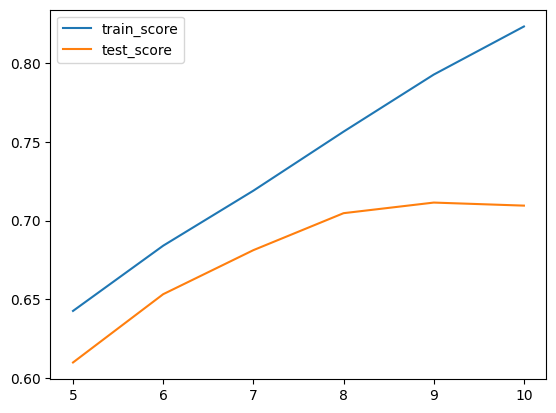

In [ ]:
# trying pruning to overcome overfitting 
maxdepth = [5,6,7,8,9,10]
train_arr = []
test_arr = []

for depth in maxdepth:
    model = DecisionTreeRegressor(max_depth=depth,random_state=0)
    model.fit(X_train_scaled, y_train)
    # Evaluate the model
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_arr.append(train_score)
    test_arr.append(test_score)
    print(f'depth - {depth}')
    print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')

plt.plot(maxdepth,train_arr,label= 'train_score')
plt.plot(maxdepth,test_arr,label= 'test_score')
plt.legend()
        

In [48]:
# fixing the moddel at max_depth = 9 
tree2 = DecisionTreeRegressor(max_depth=9, random_state=0)
tree2.fit(X_train_scaled, y_train)
t_train2 = tree2.score(X_train_scaled, y_train)
t_test2 = tree2.score(X_test_scaled, y_test)
print(f'Train score   {t_train2:.3f}---------Test score   {t_test2:.3f}')

Train score   0.793---------Test score   0.711


In [60]:
model_names.append('DecisionTreeRegressor')
r2_scores.append(t_test2)

In [ ]:
# to get away with the overfitting nature of dtree trying random forest
forest1 = RandomForestRegressor(max_depth=9, n_estimators=30, random_state=0)
forest1.fit(X_train_scaled, y_train)
f_train1 = forest1.score(X_train_scaled, y_train)
f_test1 = forest1.score(X_test_scaled, y_test)
print(f'Train score   {f_train1:.3f}---------Test score   {f_test1:.3f}')

Train score   0.827---------Test score   0.766


depth - 5
Train score   0.669---------Test score   0.636

depth - 6
Train score   0.714---------Test score   0.679

depth - 7
Train score   0.756---------Test score   0.715

depth - 8
Train score   0.794---------Test score   0.745

depth - 9
Train score   0.827---------Test score   0.766

depth - 10
Train score   0.858---------Test score   0.781

depth - 12
Train score   0.907---------Test score   0.799

depth - 15
Train score   0.950---------Test score   0.810

depth - 20
Train score   0.970---------Test score   0.811

depth - 25
Train score   0.972---------Test score   0.811



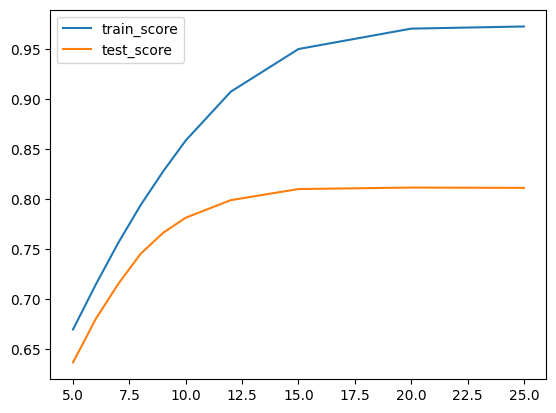

In [128]:
# searching for a better model
maxdepth = [5,6,7,8,9,10,12,15,20,25]
train_arr = []
test_arr = []

for depth in maxdepth:
    model = RandomForestRegressor(max_depth=depth, n_estimators=30,random_state=0)
    model.fit(X_train_scaled, y_train)
    # Evaluate the model
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_arr.append(train_score)
    test_arr.append(test_score)
    print(f'depth - {depth}')
    print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')

plt.plot(maxdepth,train_arr,label= 'train_score')
plt.plot(maxdepth,test_arr,label= 'test_score')
plt.legend()

In [50]:
# I think that depth = 10 is a fine balanced model
forest2 = RandomForestRegressor(max_depth=10, n_estimators=30, random_state=0)
forest2.fit(X_train_scaled, y_train)
f_train2 = forest2.score(X_train_scaled, y_train)
f_test2 = forest2.score(X_test_scaled, y_test)
print(f'Train score   {f_train2:.3f}---------Test score   {f_test2:.3f}')

Train score   0.858---------Test score   0.781


In [61]:
model_names.append('RandomForestRegressor')
r2_scores.append(f_test2)

In [ ]:
# trying gradient boosting algorithm
gb1 = GradientBoostingRegressor(random_state=0)
gb1.fit(X_train_scaled, y_train)
g_train1 = gb1.score(X_train_scaled, y_train)
g_test1 = gb1.score(X_test_scaled, y_test)
print(f'Train score   {g_train1:.3f}---------Test score   {g_test1:.3f}')
# good model lets see if we can get something better

Train score   0.791---------Test score   0.762


depth - 3
Train score   0.812---------Test score   0.778

depth - 4
Train score   0.850---------Test score   0.804

depth - 5
Train score   0.884---------Test score   0.819

depth - 6
Train score   0.916---------Test score   0.823

depth - 7
Train score   0.942---------Test score   0.828

depth - 8
Train score   0.965---------Test score   0.829

depth - 9
Train score   0.979---------Test score   0.827

depth - 10
Train score   0.990---------Test score   0.827

depth - 12
Train score   0.999---------Test score   0.818

depth - 15
Train score   1.000---------Test score   0.791



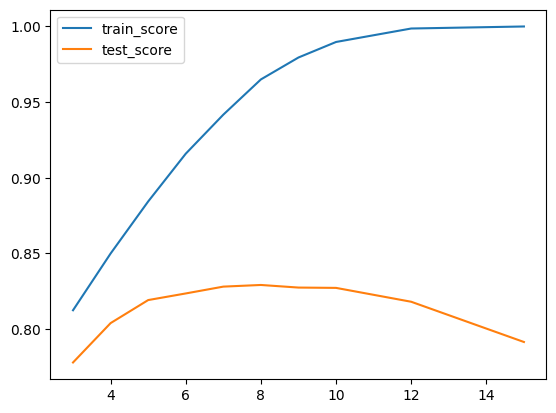

In [136]:
maxdepth = [3,4,5,6,7,8,9,10,12,15]
train_arr = []
test_arr = []

for depth in maxdepth:
    model = GradientBoostingRegressor(max_depth=depth,random_state=0,learning_rate=0.15)
    model.fit(X_train_scaled, y_train)
    # Evaluate the model
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_arr.append(train_score)
    test_arr.append(test_score)
    print(f'depth - {depth}')
    print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')

plt.plot(maxdepth,train_arr,label= 'train_score')
plt.plot(maxdepth,test_arr,label= 'test_score')
plt.legend()

In [52]:
# we finalise at depth = 5
gb2 = GradientBoostingRegressor(max_depth=5,random_state=0,learning_rate=0.15)
gb2.fit(X_train_scaled, y_train)
g_train2 = gb2.score(X_train_scaled, y_train)
g_test2 = gb2.score(X_test_scaled, y_test)
print(f'Train score   {g_train2:.3f}---------Test score   {g_test2:.3f}')

Train score   0.884---------Test score   0.819


In [62]:
model_names.append('GradientBoostingRegressor')
r2_scores.append(g_test2)

In [ ]:
# the default support vector regressor has a poor performance it should be tuned 
svr1 = SVR()
svr1.fit(X_train_scaled, y_train)
s_train1 = svr1.score(X_train_scaled, y_train)
s_test1 = svr1.score(X_test_scaled, y_test)
print(f'Train score   {s_train1:.3f}---------Test score   {s_test1:.3f}')

Train score   -0.048---------Test score   -0.042


gamma - 0.05
Train score   0.419---------Test score   0.417

gamma - 0.1
Train score   0.501---------Test score   0.495

gamma - 0.15
Train score   0.508---------Test score   0.500



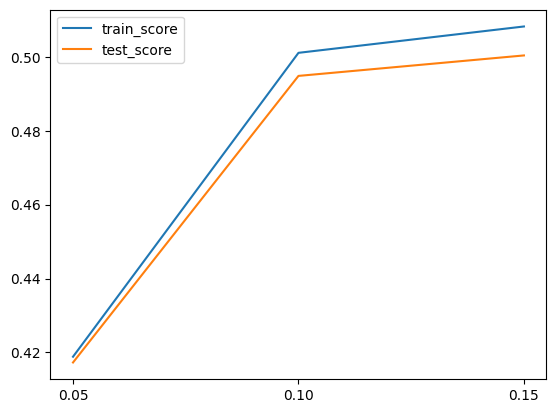

In [ ]:
gammas = [0.05,0.1,0.15]

train_arr = []
test_arr = []

for gamma in gammas:
    model = SVR(gamma=gamma,kernel='sigmoid',C=100)
    model.fit(X_train_scaled, y_train)
    # Evaluate the model
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_arr.append(train_score)
    test_arr.append(test_score)
    print(f'gamma - {gamma}')
    print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')

plt.plot(gammas,train_arr,label= 'train_score')
plt.plot(gammas,test_arr,label= 'test_score')
plt.xticks(gammas)
plt.legend()

In [26]:
# after a lot of twitching and tweaking the model we have come up with an ok-ish model
svr2 = SVR(gamma=0.15,kernel='sigmoid',C=100)
svr2.fit(X_train_scaled, y_train)
s_train2 = svr2.score(X_train_scaled, y_train)
s_test2 = svr2.score(X_test_scaled, y_test)
print(f'Train score   {s_train2:.3f}---------Test score   {s_test2:.3f}')

Train score   0.508---------Test score   0.500


In [63]:
model_names.append('SVR')
r2_scores.append(s_test2)

In [40]:
# the default mlp model
mlp1 = MLPRegressor(random_state=0)
mlp1.fit(X_train_scaled, y_train)
m_train1 = mlp1.score(X_train_scaled, y_train)
m_test1 = mlp1.score(X_test_scaled, y_test)
print(f'Train score   {m_train1:.3f}---------Test score   {m_test1:.3f}')
# it has a very poor performance 

Train score   -1.119---------Test score   -1.112


/home/veegee/venvs/personality_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


lr - 0.4
Train score   0.803---------Test score   0.774

lr - 0.5
Train score   0.817---------Test score   0.781

lr - 0.6
Train score   0.819---------Test score   0.789

lr - 0.7
Train score   0.809---------Test score   0.777

lr - 0.8
Train score   0.806---------Test score   0.778



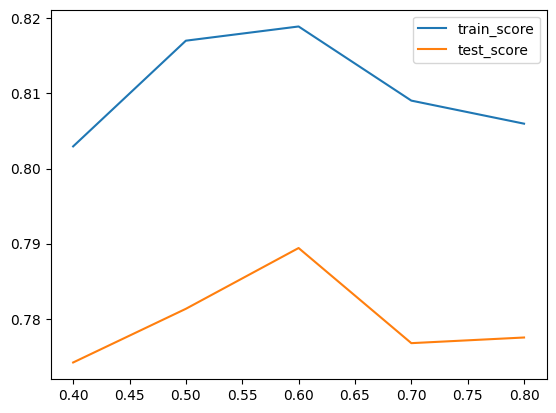

In [41]:
# lets try mlp's with various learning rates
lrs = [0.4,0.5,0.6,0.7,0.8]

train_arr = []
test_arr = []

for lr in lrs:
    model = MLPRegressor(random_state=0,learning_rate_init=lr,max_iter=800)
    model.fit(X_train_scaled, y_train)
    # Evaluate the model
    train_score = model.score(X_train_scaled,y_train)
    test_score = model.score(X_test_scaled,y_test)
    train_arr.append(train_score)
    test_arr.append(test_score)
    print(f'lr - {lr}')
    print(f'Train score   {train_score:.3f}---------Test score   {test_score:.3f}\n')

plt.plot(lrs,train_arr,label= 'train_score')
plt.plot(lrs,test_arr,label= 'test_score')
plt.legend()

In [42]:
# The final mlp model
mlp2 = MLPRegressor(random_state=0,learning_rate_init=0.6,max_iter=800)
mlp2.fit(X_train_scaled, y_train)
m_train2 = mlp2.score(X_train_scaled, y_train)
m_test2 = mlp2.score(X_test_scaled, y_test)
print(f'Train score   {m_train2:.3f}---------Test score   {m_test2:.3f}')

Train score   0.819---------Test score   0.789


In [64]:
model_names.append('MLPRegressor')
r2_scores.append(m_test2)

['ElasticNet', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'MLPRegressor'] [0.6254312334082688, 0.7114047700727375, 0.7810529180149542, 0.8190917070149913, 0.5003597154252963, 0.7894195988256504]


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'ElasticNet'),
  Text(1, 0, 'DecisionTreeRegressor'),
  Text(2, 0, 'RandomForestRegressor'),
  Text(3, 0, 'GradientBoostingRegressor'),
  Text(4, 0, 'SVR'),
  Text(5, 0, 'MLPRegressor')])

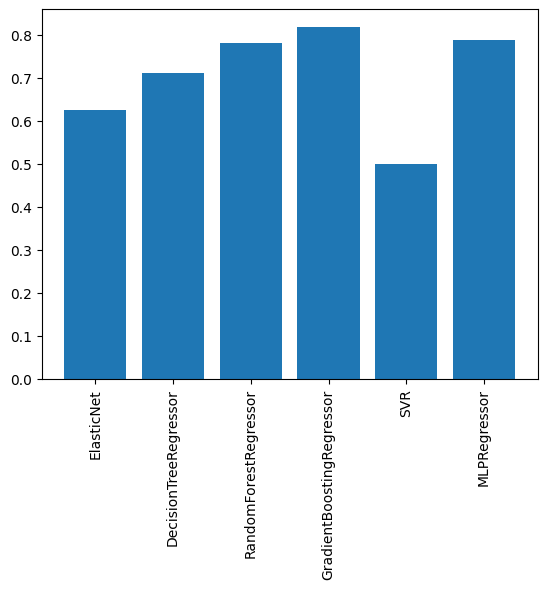

In [ ]:
# we can compare the performances of each model as a bar plot
plt.bar(model_names,r2_scores)
plt.xticks(rotation=90)